<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS767/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_valid, X_train = X_train_full[:6000]/255.0 , X_train_full[6000:]/255.0
Y_valid, Y_train = Y_train_full[:6000] , Y_train_full[6000:]
X_test = X_test / 255.0

In [6]:
input1 = keras.layers.Flatten(input_shape=[28,28])
hidden1 = keras.layers.Dense(100, activation='relu', name="Hidden1")
output = keras.layers.Dense(10, activation='softmax', name="Output" )
model1 = keras.models.Sequential([input1, hidden1, output])
model1.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])


In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 100)               78500     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist1 = model1.fit(X_train, Y_train,epochs=20, batch_size=32, validation_data=(X_valid, Y_valid), verbose=0)

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7733 - accuracy: 0.7527 - val_loss: 0.5584 - val_accuracy: 0.8162
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5290 - accuracy: 0.8203 - val_loss: 0.5175 - val_accuracy: 0.8222
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4820 - accuracy: 0.8337 - val_loss: 0.4773 - val_accuracy: 0.8355
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4559 - accuracy: 0.8422 - val_loss: 0.4424 - val_accuracy: 0.8480
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4377 - accuracy: 0.8490 - val_loss: 0.4417 - val_accuracy: 0.8497
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4236 - accuracy: 0.8529 - val_loss: 0.4233 - val_accuracy: 0.8522
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4118 - accuracy: 0.8577 - val_loss: 0.4200 - val_accuracy:

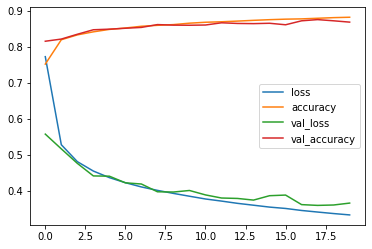

In [9]:
df = pd.DataFrame(hist1.history)
plt.plot(df)
plt.legend(df.columns)


In [10]:
input1 = keras.layers.Flatten(input_shape=[28,28])
hidden1 = keras.layers.Dense(100, activation='relu', name="Hidden1")
hidden2 = keras.layers.Dense(100, activation='relu', name="Hidden2")
output = keras.layers.Dense(10, activation='softmax', name="Output" )
model2 = keras.models.Sequential([input1, hidden1, hidden2, output])
model2.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [11]:
hist2 = model2.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid), verbose=0)

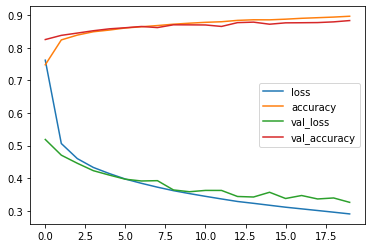

In [12]:
df = pd.DataFrame(hist2.history)
plt.plot(df)
plt.legend(df.columns)

In [13]:
input1 = keras.layers.Flatten(input_shape=[28,28])
hidden1 = keras.layers.Dense(100, activation='relu', name="Hidden1")
hidden2 = keras.layers.Dense(100, activation='relu', name="Hidden2")
hidden3 = keras.layers.Dense(100, activation='relu', name="Hidden3")
output = keras.layers.Dense(10, activation='softmax', name="Output" )
model3 = keras.models.Sequential([input1, hidden1, hidden2, hidden3, output])
model3.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 100)               78500     
_________________________________________________________________
Hidden2 (Dense)              (None, 100)               10100     
_________________________________________________________________
Hidden3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [14]:
hist3 = model3.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid), verbose=0)

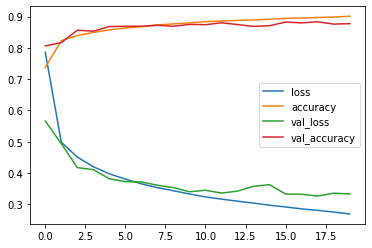

In [15]:
df = pd.DataFrame(hist3.history)
plt.plot(df)
plt.legend(df.columns)